In [1]:
# from esda.moran import Moran
# from libpysal.weights import Queen, KNN
# import seaborn
import pandas as pd
import geopandas as gpd
# import numpy
import matplotlib.pyplot as plt
import cenpy
import os
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors

/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
acs = cenpy.products.ACS(2019)

In [3]:
vars_to_download = {
    "B01003_001E":"TOTAL POPULATION",
    # "B25077_001E": "median_house_value",  # Median house value
    # "B02001_002E": "total_pop_white",     # Total white population
    # "B01003_001E": "total_pop",           # Total population
    # "B25003_003E": "total_rented",        # Total rented occupied
    # "B25001_001E": "total_housing_units", # Total housing units
    # "B09019_006E": "hh_female",           # Female households
    # "B09019_001E": "hh_total",            # Total households
    # "B15003_002E": "total_bachelor",      # Total w/ Bachelor degree
    # "B25018_001E": "median_no_rooms",     # Median number of rooms
    # "B19083_001E": "income_gini",         # Gini index of income inequality
    "B01002_001E": "median_age",          # Median age
    "B08303_001E": "tt_work",              # Aggregate travel time to work
    "B19013_001E": "median_hh_income",     # Median household income
    "B01001_020E":"Estimate!!Total!!Male!!65 and 66 years",
    "B01001_021E":"Estimate!!Total!!Male!!67 to 69 years",
    "B01001_022E":"Estimate!!Total!!Male!!70 to 74 years",
    "B01001_023E":"stimate!!Total!!Male!!75 to 79 years",
    "B01001_024E":"Estimate!!Total!!Male!!80 to 84 years",
    "B01001_025E":"Estimate!!Total!!Male!!85 years and over",
    "B01001_044E":"Estimate!!Total!!Female!!65 and 66 years",
    "B01001_045E":"Estimate!!Total!!Female!!67 to 69 years",
    "B01001_046E":"Estimate!!Total!!Female!!70 to 74 years",
    "B01001_047E":"Estimate!!Total!!Female!!75 to 79 years",
    "B01001_048E":"Estimate!!Total!!Female!!80 to 84 years",
    "B01001_049E":"Estimate!!Total!!Female!!85 years and over"
}
vars_to_download_l = list(vars_to_download.keys())

In [4]:
acs.variables.to_csv(os.getcwd()+'/acs_variables.csv')

In [5]:
states_gdf = gpd.read_file('/Users/alex/Documents/spatial_autocorrelation_work/cb_2018_us_state_500k')

In [6]:
states_gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [7]:
%%time
austin = acs.from_msa("Austin, TX",
                  # level="tract",
                  variables=vars_to_download_l
                 )
san_antonio = acs.from_msa("San Antonio, TX",
                  # level="tract",
                  variables=vars_to_download_l
                 )

dallas = acs.from_msa("Dallas, TX",
                  # level="tract",
                  variables=vars_to_download_l
                 )

/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/cenpy/products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(
/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/cenpy/products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(
/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/cenpy/products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


CPU times: user 5.24 s, sys: 173 ms, total: 5.41 s
Wall time: 1min 10s


In [8]:
houston = acs.from_msa("Houston, TX",
                  # level="tract",
                  variables=vars_to_download_l
                 )

/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/cenpy/products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


In [9]:
for df in [austin,houston,dallas,san_antonio]:
    df['men_65+'] = df.B01001_020E + df.B01001_021E + df.B01001_022E + df.B01001_023E + df.B01001_024E + df.B01001_025E
    df['women_65+'] = df.B01001_044E + df.B01001_045E + df.B01001_046E + df.B01001_047E + df.B01001_048E + df.B01001_049E 
    df['over_65'] = df['men_65+'] + df['women_65+']
    df.rename(columns={'B01003_001E':'tot_pop'},inplace=True)


In [10]:
gdf = pd.concat([austin,dallas,houston,san_antonio])

(-693401.004512612, 685100.669039499, -2175858.6771807177, -880430.6704149562)

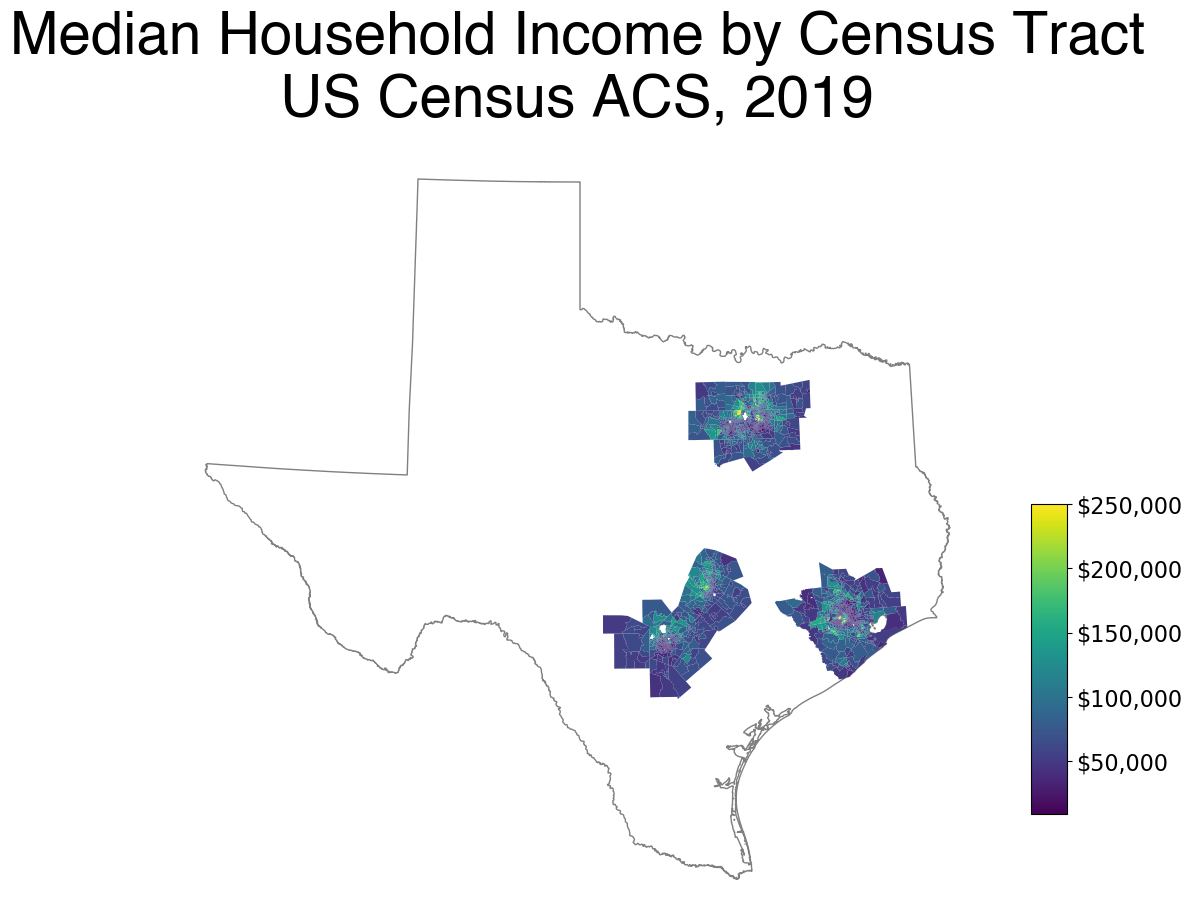

In [11]:
fig, ax = plt.subplots(figsize=(12,10))
states_gdf[states_gdf.STUSPS=='TX'].to_crs('epsg:2163').plot(ax=ax,color='none',edgecolor='grey')

# set the font for the visualization to Helvetica
hfont = {'fontname':'Helvetica'}
ax.set_title('Median Household Income by Census Tract\nUS Census ACS, 2019', **hfont, fontdict={'fontsize': '42', 'fontweight' : '1'})

col = 'B19013_001E'
gdf.to_crs('epsg:2163').plot(ax=ax,column='B19013_001E')

vmin, vmax = gdf[col].min(), gdf[col].max() #math.ceil(gdf.pct_food_insecure.max())
colormap = "viridis"
# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31]) 
# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
fig.colorbar(sm, cax=cbax, format='${x:,.0f}')
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
ax.axis('off')
# ax.annotate("Data: USDA Economic Research Service, accessed 15 Jan 23\nhttps://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/key-statistics-graphics/#map", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')


In [12]:
print('Weighted Median HH Income Estimate by Metro Area:\n')

austin['hhinc_times_pop'] = austin.B19013_001E * austin.tot_pop
print('Austin :' + f"${round(austin['hhinc_times_pop'].sum() / austin.tot_pop.sum(),0):,}")

dallas['hhinc_times_pop'] = dallas.B19013_001E * dallas.tot_pop
print("Dallas : " + f"${round(dallas['hhinc_times_pop'].sum() / dallas.tot_pop.sum(),0):,}")

houston['hhinc_times_pop'] = houston.B19013_001E * houston.tot_pop
print('Houston : ' + f"${round(houston['hhinc_times_pop'].sum() / houston.tot_pop.sum(),0):,}")



san_antonio['hhinc_times_pop'] = san_antonio.B19013_001E * san_antonio.tot_pop
print('San Antonio : ' + f"${round(san_antonio['hhinc_times_pop'].sum() / san_antonio.tot_pop.sum(),0):,}")


# print('Dallas' + ' : ' + f"{dallas.over_65.sum():,}")
# print('Houston' + ' : ' + f"{houston.over_65.sum():,}")
# print('San Antonio' + ' : ' + f"{san_antonio.over_65.sum():,}")
# print('Austin' + ' : ' + f"{austin.over_65.sum():,}")


Weighted Median HH Income Estimate by Metro Area:

Austin :$83,840.0
Dallas : $78,833.0
Houston : $76,242.0
San Antonio : $65,364.0


(-693401.004512612, 685100.669039499, -2175858.6771807177, -880430.6704149562)

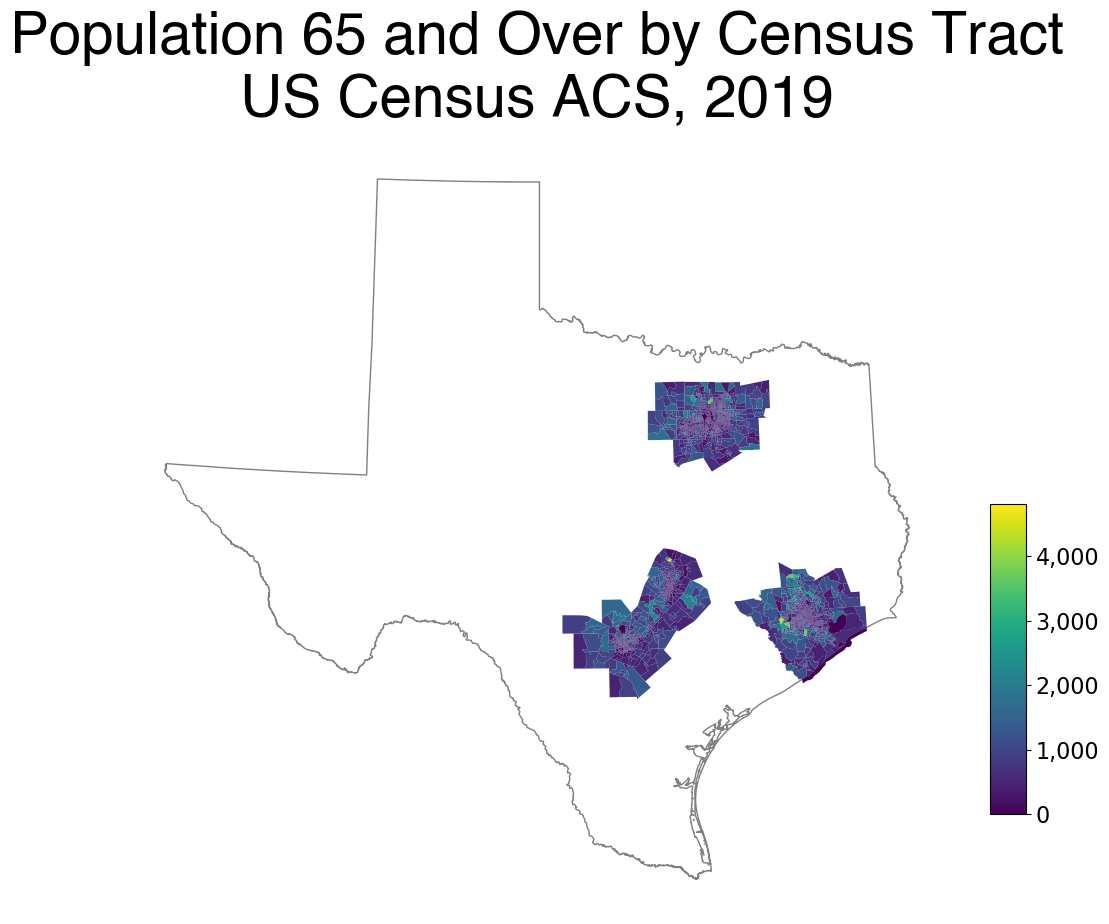

In [13]:
fig, ax = plt.subplots(figsize=(12,10))
states_gdf[states_gdf.STUSPS=='TX'].to_crs('epsg:2163').plot(ax=ax,color='none',edgecolor='grey')

# set the font for the visualization to Helvetica
hfont = {'fontname':'Helvetica'}
ax.set_title('Population 65 and Over by Census Tract\nUS Census ACS, 2019', **hfont, fontdict={'fontsize': '42', 'fontweight' : '1'})

col = 'over_65'
gdf.to_crs('epsg:2163').plot(ax=ax,column='over_65')

vmin, vmax = gdf[col].min(), gdf[col].max() #math.ceil(gdf.pct_food_insecure.max())
colormap = "viridis"
# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31]) 
# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
fig.colorbar(sm, cax=cbax, format='{x:,.0f}')
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
ax.axis('off')
# ax.annotate("Data: USDA Economic Research Service, accessed 15 Jan 23\nhttps://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/key-statistics-graphics/#map", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')


In [14]:
print('Population 65 and over by Metro Area:\n')
print('Dallas' + ' : ' + f"{dallas.over_65.sum():,}")
print('Houston' + ' : ' + f"{houston.over_65.sum():,}")
print('San Antonio' + ' : ' + f"{san_antonio.over_65.sum():,}")
print('Austin' + ' : ' + f"{austin.over_65.sum():,}")


Population 65 and over by Metro Area:

Dallas : 801,303.0
Houston : 741,982.0
San Antonio : 315,513.0
Austin : 222,115.0
